<a href="https://colab.research.google.com/github/Macostik/ML_cource/blob/main/HomeWork18/Reinforcement_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Highway environment

## Install dependencies

In [4]:
# Install stable-baselines latest version
!pip install "stable-baselines3[extra]>=2.0.0a4"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:00


In [5]:
# Install highway-env
!pip install highway-env

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 3.1 MB/s eta 0:00:00


## Import dependencies

In [6]:
import gymnasium as gym
import highway_env
import numpy as np

from stable_baselines3 import HerReplayBuffer, SAC, DDPG
from stable_baselines3.common.noise import NormalActionNoise

## Setup parking environment

In [7]:
# Parking version 0
env = gym.make("parking-v0")

## Create SAC model with hyperparameters

In [8]:
# SAC hyperparams:
model = SAC(
    "MultiInputPolicy",
    env,
    replay_buffer_class=HerReplayBuffer,
    replay_buffer_kwargs=dict(
        n_sampled_goal=4,
        goal_selection_strategy="future",
    ),
    verbose=1,
    buffer_size=int(1e6),
    learning_rate=1e-3,
    gamma=0.95,
    batch_size=256,
    policy_kwargs=dict(net_arch=[256, 256, 256]),
)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Train and save the model

In [9]:
# Train for 1e5 steps
model.learn(int(1e5))

# Save the trained agent
model.save('her_sac_highway')

Streaming output truncated to the last 5000 lines.
|    success_rate    | 0.96     |
| time/              |          |
|    episodes        | 2112     |
|    fps             | 34       |
|    time_elapsed    | 2231     |
|    total_timesteps | 77294    |
| train/             |          |
|    actor_loss      | 1.64     |
|    critic_loss     | 0.00496  |
|    ent_coef        | 0.00516  |
|    ent_coef_loss   | -0.759   |
|    learning_rate   | 0.001    |
|    n_updates       | 77193    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 21.5     |
|    ep_rew_mean     | -7.44    |
|    success_rate    | 0.96     |
| time/              |          |
|    episodes        | 2116     |
|    fps             | 34       |
|    time_elapsed    | 2232     |
|    total_timesteps | 77365    |
| train/             |          |
|    actor_loss      | 1.58     |
|    critic_loss     | 0.00739  |
|    ent_coef        | 0.00521 

## Load the saved model

In [10]:
# Load saved model
model = SAC.load('her_sac_highway', env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


## Evaluate the current model

In [16]:
# Reset all data
obs, _ = env.reset()

# Evaluate the agent
episode_reward = 0
for _ in range(1000):
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    done = truncated or terminated
    episode_reward += reward
    if done or info.get("is_success", False):
        print("Reward:", episode_reward, "Success?", info.get("is_success", False))
        episode_reward = 0.0
        obs, _ = env.reset()

Reward: -5.867432201240832 Success? True
Reward: -6.519891688507174 Success? True
Reward: -9.543495358767236 Success? True
Reward: -6.469975418606321 Success? True
Reward: -6.233134719383759 Success? True
Reward: -4.186459664644294 Success? True
Reward: -3.214749768551479 Success? True
Reward: -8.139085214443238 Success? True
Reward: -7.204157885153626 Success? True
Reward: -5.374444092312078 Success? True
Reward: -5.890333123683897 Success? True
Reward: -3.8497303665018268 Success? True
Reward: -6.516061242085262 Success? True
Reward: -2.9923369809502205 Success? True
Reward: -6.634399905330417 Success? True
Reward: -5.827582093223356 Success? True
Reward: -9.232884032485483 Success? True
Reward: -8.196363798136602 Success? True
Reward: -6.889288284168692 Success? True
Reward: -3.2828041667554304 Success? True
Reward: -5.377310248687069 Success? True
Reward: -7.138247353203242 Success? True
Reward: -8.796260431751122 Success? True
Reward: -9.192743228001481 Success? True
Reward: -7.46

## Visualize

--2025-01-05 12:53:45--  https://raw.githubusercontent.com/eleurent/highway-env/gh-media/docs/media/parking-env.gif
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 705652 (689K) [image/gif]
Saving to: ‘parking-env.gif.1’

parking-env.gif.1   100%[===================>] 689.11K  --.-KB/s    in 0.05s   

2025-01-05 12:53:45 (12.6 MB/s) - ‘parking-env.gif.1’ saved [705652/705652]



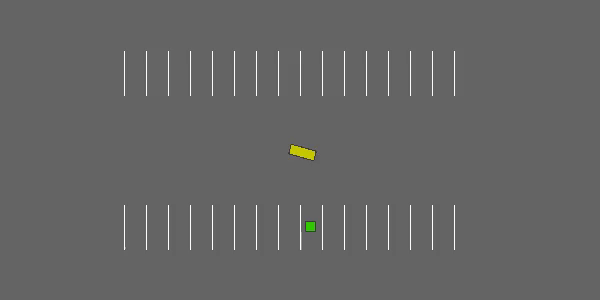

In [14]:
from IPython.display import Image
!wget https://raw.githubusercontent.com/eleurent/highway-env/gh-media/docs/media/parking-env.gif
Image(open('parking-env.gif','rb').read())

## LunarLander Environment

## Import dependencies

In [49]:
import gym
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import base64, io

import numpy as np
from collections import deque, namedtuple

# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob

In [50]:
!pip install swig
!pip install "gymnasium[box2d]"

## Instantiate the Environment and Agent

In [72]:
# Setup LunarLander environment 2 version
env = gym.make('LunarLander-v2')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

State shape:  (8,)
Number of actions:  4


/usr/local/lib/python3.10/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


## Define Neural Network Architecture.

In [54]:
class QNetwork(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
        """
        super(QNetwork, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, action_size)

    def forward(self, state):
        """Build a network that maps state -> action values."""
        x = self.fc1(state)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        return self.fc3(x)

## Define some hyperparameter

In [55]:
# Setup hyperparameters
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate
UPDATE_EVERY = 4        # how often to update the network

In [56]:
# Check if GPU is available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Define Agent

In [57]:
class Agent():
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, seed):
        """Initialize an Agent object.

        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        # Q-Network
        self.qnetwork_local = QNetwork(state_size, action_size, seed).to(device)
        self.qnetwork_target = QNetwork(state_size, action_size, seed).to(device)
        self.optimizer = optim.Adam(self.qnetwork_local.parameters(), lr=LR)

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)
        # Initialize time step (for updating every UPDATE_EVERY steps)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Learn every UPDATE_EVERY time steps.
        self.t_step = (self.t_step + 1) % UPDATE_EVERY
        if self.t_step == 0:
            # If enough samples are available in memory, get random subset and learn
            if len(self.memory) > BATCH_SIZE:
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)

    def act(self, state, eps=0.):
        """Returns actions for given state as per current policy.

        Params
        ======
            state (array_like): current state
            eps (float): epsilon, for epsilon-greedy action selection
        """
        state = torch.from_numpy(state).float().unsqueeze(0).to(device)
        self.qnetwork_local.eval()
        with torch.no_grad():
            action_values = self.qnetwork_local(state)
        self.qnetwork_local.train()

        # Epsilon-greedy action selection
        if random.random() > eps:
            return np.argmax(action_values.cpu().data.numpy())
        else:
            return random.choice(np.arange(self.action_size))

    def learn(self, experiences, gamma):
        """Update value parameters using given batch of experience tuples.

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples
            gamma (float): discount factor
        """
        # Obtain random minibatch of tuples from D
        states, actions, rewards, next_states, dones = experiences

        ## Compute and minimize the loss
        ### Extract next maximum estimated value from target network
        q_targets_next = self.qnetwork_target(next_states).detach().max(1)[0].unsqueeze(1)
        ### Calculate target value from bellman equation
        q_targets = rewards + gamma * q_targets_next * (1 - dones)
        ### Calculate expected value from local network
        q_expected = self.qnetwork_local(states).gather(1, actions)

        ### Loss calculation (we used Mean squared error)
        loss = F.mse_loss(q_expected, q_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # ------------------- update target network ------------------- #
        self.soft_update(self.qnetwork_local, self.qnetwork_target, TAU)

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model (PyTorch model): weights will be copied from
            target_model (PyTorch model): weights will be copied to
            tau (float): interpolation parameter
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)

## Define Replay Buffer

In [58]:
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

## Train the model

In [59]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

agent = Agent(state_size=8, action_size=4, seed=0)
scores = dqn()

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 100	Average Score: -174.35
Episode 200	Average Score: -103.54
Episode 300	Average Score: -38.62
Episode 400	Average Score: 118.61
Episode 500	Average Score: 179.26
Episode 600	Average Score: 179.74
Episode 700	Average Score: 149.11
Episode 800	Average Score: 145.21
Episode 900	Average Score: 153.84
Episode 994	Average Score: 202.09
Environment solved in 894 episodes!	Average Score: 202.09


## Plot the learning progress

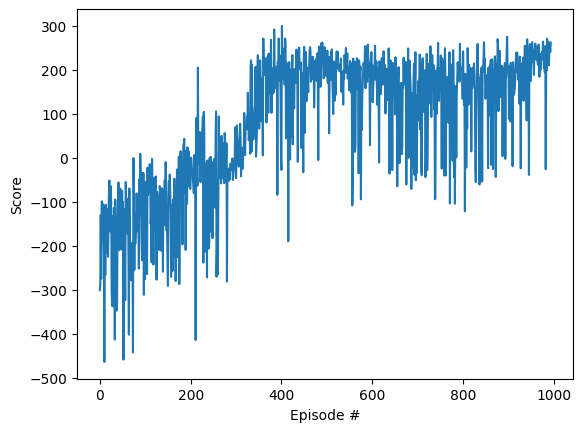

In [60]:
# Plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Animate it with Video

In [74]:
def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(agent, env_name):
    env = gym.make(env_name)
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))
    agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
    state = env.reset()
    done = False
    while not done:
        frame = env.render(mode='rgb_array')
        vid.capture_frame()

        action = agent.act(state)

        state, reward, done, _ = env.step(action)
    env.close()

In [76]:
# Create agent
agent = Agent(state_size=8, action_size=4, seed=0)

# Show video of model
show_video_of_model(agent, 'LunarLander-v2')

<ipython-input-74-842c1171cd92>:17: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))
/usr/local/lib/python3.1

In [84]:
# Show video
show_video('LunarLander-v2')

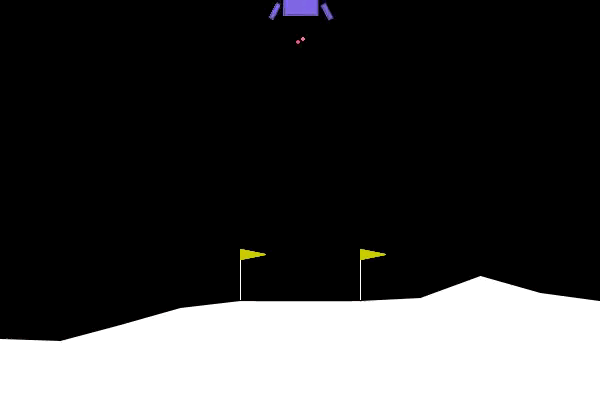

In [85]:
# Show the result in the Colab
from IPython.display import Image
Image(open('/content/LunarLander-v2.gif','rb').read())

## Conclusion:

I trained a Reinforcement Learning framework using Stable Baselines3, achieving remarkable results in both the Highway and Lunar Lander environments. In the Highway environment, the model successfully learned key rules, enabling a vehicle to park in a designated space with the correct heading, achieving approximately 60 successful parking attempts. Meanwhile, the Lunar Lander model demonstrated strong performance, consistently landing the rocket within the allowed range and achieving an average score of 200 points across nearly 1,000 episodes. With further optimization and additional data, I am confident these models can achieve even greater success.